Neste notebook ilustramos o conceito de compressão de PDF's utilizando PCA. As PDF's comprimidas são de redshifts fotométricos, geradas a partir de uma distribuição gaussiana de variância fixa.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm

from sklearn.decomposition import PCA
import os

Abaixo importamos os dados z_photo e geramos uma distribuição gaussiana centrada em cada redshift, com desvio padrão fixo.

In [2]:
z_photo=np.loadtxt('z_photo.dat')
sigma=0.199

#generating PDF's as (x,pdf(x))
nbins = 200
bins = np.linspace(z_photo.min()-3*sigma,z_photo.max()+3*sigma, nbins)
pdf=np.array(list(map(lambda zp : norm.pdf(bins, loc=zp, scale=sigma),z_photo)))
print("PDF shape = ", np.shape(pdf))

PDF shape =  (20541, 200)


Aqui definimos e fitamos o objeto PCA. Utilizamos 50 componentes, mas veremos que isso é muito! 

In [3]:
n_components=50
pca=PCA(n_components=n_components)

PDF=pdf
pca.fit(PDF)

compressed=pca.transform(PDF)
decomp=pca.inverse_transform(compressed)

eigenvalues=pca.singular_values_
tot=np.sum(eigenvalues)

var_exp = [(i / tot) for i in eigenvalues]
cum_var_exp=np.cumsum(var_exp)

print("Shape of compressed data: ",np.shape(compressed))

Shape of compressed data:  (20541, 50)


Veja abaixo que as 4 primeiras componentes contém ~99.75 % da informação!

Percentage of variance on PC1 =  74.6190385838593 %
Percentage of variance on PC2 =  19.76942463347221 %
Percentage of variance on PC3 =  4.292424889145132 %
Percentage of variance on sum(PC>4) =  0.2523590409108575 %


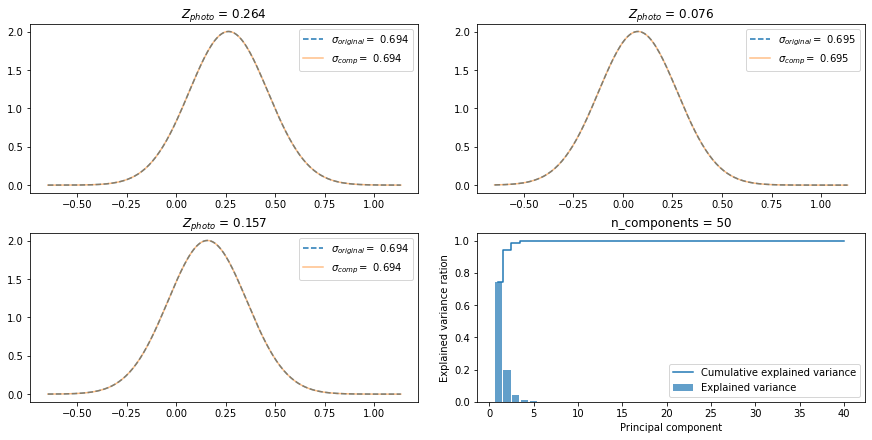

In [8]:
print("Percentage of variance on PC1 = ", 100*var_exp[0], "%")
print("Percentage of variance on PC2 = ", 100*var_exp[1], "%")
print("Percentage of variance on PC3 = ", 100*var_exp[2], "%")
print("Percentage of variance on sum(PC>4) = ",np.sum(var_exp[4:])*100, "%")

ver=2
hor=2

fig = plt.figure(figsize=(12, 6), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.05, right=0.5, wspace=0.05)

k=0
for v in range(ver):
    for h in range(hor):
        i=1000*k # para pegar redshifts espaçados na lista
        if k<ver*hor-1:
            ax = fig.add_subplot(gs[v, h])

            ax.plot(bins, PDF[i],'--',  alpha=1, label="$\sigma_{original} = $ "+str(round(np.sqrt(PDF[i].var(ddof=1)),3)))
            ax.plot(bins, decomp[i],'-', alpha=0.5, label="$\sigma_{comp} = $ "+str(round(np.sqrt(decomp[i].var(ddof=1)),3)))

            ax.set_title("$Z_{photo}$ = "+str(round(z_photo[i],3)))
            plt.legend(loc='best')
            k+=1
        else:
            nplot=40 #number of principal components to plot
            ax = fig.add_subplot(gs[v, h])
            ax.bar(range(1,nplot+1),var_exp[:nplot],alpha=0.7,align='center',label='Explained variance')
            ax.step(range(1,nplot+1),cum_var_exp[:nplot],where='mid',label='Cumulative explained variance')
            ax.set_ylabel("Explained variance ration")
            ax.set_xlabel("Principal component")
            ax.set_title("n_components = "+str(n_components))
            plt.legend(loc='best')

De fato, fitar componentes PCA em dados gaussianos é uma tarefa trivial!

Para um problema mais complicado confira o código "PDF_compression.ipynb", onde aplicamos a técnica PCA e um auto-encoder em dados reais de redshift fotométrico.